Here I import all the necessary packages for this project.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

Here we imported the data and set it to 'title'.

In [2]:
title = pd.read_csv('netflix_titles.csv')

In [3]:
title.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Here are all the columns of the data

In [4]:
title.keys()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Here we are looking as the different types of data we have and how many counts each data we have.

In [5]:
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Here I made the tv/movie column, in which everything with a one is movie.

In [6]:
# creating a blank series
tv_movie = pd.Series([])

# running a for loop and assigning some values to series
for i in range(len(title)):
    if title["type"][i] == 'Movie':
        tv_movie[i]= 1
 
    else:
        tv_movie[i]= 0
 
         
# inserting new column with values of list made above       
title.insert(2, "tv_movie", tv_movie)
 
# list output
title.head()

<ipython-input-6-58156655ff9f>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tv_movie = pd.Series([])


,show_id,type,tv_movie,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,0,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,1,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,1,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,1,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,1,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


There are 2410 tv shows compared to 5377 movies.

In [7]:
title['tv_movie'].value_counts()

1    5377
0    2410
Name: tv_movie, dtype: int64

<AxesSubplot:>

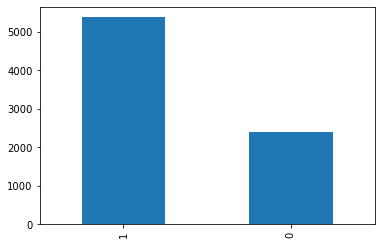

In [8]:
pd.value_counts(title['tv_movie']).plot.bar()

Here are all of the different ratings and the value counts of them. 

In [9]:
title['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

Here are all of the different listed_in and the value counts of them. We can see that a lot of them are listed under comedy. 

In [10]:
title['listed_in'].value_counts()

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
                                                   ... 
British TV Shows, TV Horror, TV Thrillers             1
Dramas, Music & Musicals, Sci-Fi & Fantasy            1
Independent Movies                                    1
TV Horror, TV Mysteries, Teen TV Shows                1
Crime TV Shows, TV Dramas, TV Horror                  1
Name: listed_in, Length: 492, dtype: int64

We cannot really see much correlations in this part as only the release_year and tv_movies are numeric.

In [11]:
title.corr()

,tv_movie,release_year
tv_movie,1.000000,-0.172715
release_year,-0.172715,1.000000


Dropping all nulls

In [12]:
title.dropna()

,show_id,type,tv_movie,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,1,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,1,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,1,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,1,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,0,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,1,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7780,s7781,Movie,1,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,1,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,1,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


In [13]:
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   tv_movie      7787 non-null   int64 
 3   title         7787 non-null   object
 4   director      5398 non-null   object
 5   cast          7069 non-null   object
 6   country       7280 non-null   object
 7   date_added    7777 non-null   object
 8   release_year  7787 non-null   int64 
 9   rating        7780 non-null   object
 10  duration      7787 non-null   object
 11  listed_in     7787 non-null   object
 12  description   7787 non-null   object
dtypes: int64(2), object(11)
memory usage: 791.0+ KB


In [14]:
title['description'] = title['description'].fillna('')

Here I am convering description to a matrix of TF-IDF features.

In [15]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(title['description'])

In [16]:
tfidf_matrix.shape

(7787, 104889)

Here I am computing the linear kernel between X and Y.

In [17]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [18]:
cosine_sim[0]

array([1.        , 0.        , 0.02162604, ..., 0.        , 0.        ,
       0.        ])

In [19]:
title = title.reset_index()
titles = title['title']
indices = pd.Series(title.index, index=title['title'])

Here is a function with movie recommendations based on description.

In [20]:
def movie_recommendations(title):
    idx = indices[title]
    score = list(enumerate(cosine_sim[idx]))
    score = sorted(score, key=lambda x: x[1], reverse=True)
    score = score[1:31]
    movie_indices = [i[0] for i in score]
    return titles.iloc[movie_indices]

In [21]:
movie_recommendations('Naruto').head(10)

872                                Beyblade: Metal Fusion
5330                                              Sabrina
2501                                              Gormiti
5345                         Saint Seiya: The Lost Canvas
4408                          Naruto Shippuden: The Movie
4407                      Naruto Shippuden : Blood Prison
5753                                         Spider-Man 3
4887                                               Pocoyo
4405                    Naruto Shippûden the Movie: Bonds
4411    Naruto the Movie 3: Guardians of the Crescent ...
Name: title, dtype: object